# Objective:
I am aiming to combine extensive exploratory data analysis (EDA) with data visualization to understand the impact of wildfires on air quality in the US Northeast Coast.


MODIS (Moderate Resolution Imaging Spectroradiometer) and VIIRS (Visible Infrared Imaging Radiometer Suite) are types of satellite sensors used for detecting and monitoring wildfires. MODIS is on NASA's Terra and Aqua satellites, while VIIRS is on the Suomi NPP and NOAA-20 satellites. They provide data for various applications, including environmental monitoring and weather prediction.

# VIIRS: 
Offers a higher spatial resolution at 375 meters. This finer resolution provides better detail, especially for detecting smaller fires and for mapping the perimeters of larger fires.
# MODIS: 
Has a coarser spatial resolution of 1 kilometer. This lower resolution will miss smaller fires but is sufficient for detecting larger fire events.

By combining VIIRS and MODIS data, I will have a more comprehensive detection of wildfires. VIIRS will provide high-resolution data for smaller and more detailed fire detections, while MODIS can offer broader coverage and may fill in gaps where VIIRS data might not be available or as frequent.

In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import seaborn as sns

In [4]:
# Load CSV files
modis_data_ca = pd.read_csv('./Data/NASA wildfires/modis_2023_Canada.csv')
modis_data_us = pd.read_csv('./Data/NASA wildfires/modis_2023_United_States.csv')
viirs_data_ca = pd.read_csv('./Data/NASA wildfires/viirs-snpp_2023_Canada.csv')
viirs_data_us = pd.read_csv('./Data/NASA wildfires/viirs-snpp_2023_United_States.csv')

# Inspect the first few rows of each dataset
print("modis_2023_Canada:")
print(modis_data_ca.head(), "\n")

print("modis_2023_United_States:")
print(modis_data_us.head(), "\n")

print("viirs-snpp_2023_Canada:")
print(viirs_data_ca.head(), "\n")

print("viirs-snpp_2023_United_States.csv:")
print(viirs_data_us.head(), "\n")

modis_2023_Canada:
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   53.4971  -117.9781       375.0   1.5    1.2  2023-01-02      1915   
1   53.4998  -117.9604       361.8   1.5    1.2  2023-01-02      1915   
2   53.4929  -117.9582       377.4   1.5    1.2  2023-01-02      1915   
3   53.4950  -117.9712       374.5   1.0    1.0  2023-01-02      2048   
4   56.7794  -118.0159       314.9   1.3    1.1  2023-01-03       450   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS         100    61.03       265.7   0.0        D     0  
1     Terra      MODIS          91    61.03       267.0   0.0        D     0  
2     Terra      MODIS         100    61.03       266.3   0.0        D     0  
3      Aqua      MODIS         100    61.03       267.7   0.0        D     0  
4     Terra      MODIS          87    61.03       266.6  28.1        N     0   

modis_2023_United_States:
   latitude  longitude  brightness  scan

In [5]:
# Target coordinates
target_coords = [
    (48.8101, -76.3605),
    (53.08228, -75.44976),
    (52.7008, -73.5289),
    (50.470, -74.259)
]
# Cordinates picked by me inwwhich I understood to be the 3 main fires 

In [6]:
# Function to check if a point is close to any target coordinate
def is_close_to_target(lat, lon, max_distance_km=50):
    for target in target_coords:
        distance = geodesic((lat, lon), target).km
        if distance <= max_distance_km:
            return True
    return False

# checks if a single point is close to any of the target coordinates within a specified maximum distance (50km)

In [7]:
# Function to filter data within a certain distance from target coordinates
def filter_by_proximity(data, lat_col, lon_col, target_coords, max_distance_km=50):
    filtered_data = []
    for _, row in data.iterrows():
        point = (row[lat_col], row[lon_col])
        for target in target_coords:
            distance = geodesic(point, target).km
            if distance <= max_distance_km:
                filtered_data.append(row)
                break
    return pd.DataFrame(filtered_data)

In [8]:
start_date = '2023-01-01'
end_date = '2023-12-31'

modis_data_ca['acq_date'] = pd.to_datetime(modis_data_ca['acq_date'])
modis_data_us['acq_date'] = pd.to_datetime(modis_data_us['acq_date'])
viirs_data_ca['acq_date'] = pd.to_datetime(viirs_data_ca['acq_date'])
viirs_data_us['acq_date'] = pd.to_datetime(viirs_data_us['acq_date'])

modis_data_ca_filtered = modis_data_ca[(modis_data_ca['acq_date'] >= start_date) & (modis_data_ca['acq_date'] <= end_date)]
modis_data_us_filtered = modis_data_us[(modis_data_us['acq_date'] >= start_date) & (modis_data_us['acq_date'] <= end_date)]
viirs_data_ca_filtered = viirs_data_ca[(viirs_data_ca['acq_date'] >= start_date) & (viirs_data_ca['acq_date'] <= end_date)]
viirs_data_us_filtered = viirs_data_us[(viirs_data_us['acq_date'] >= start_date) & (viirs_data_us['acq_date'] <= end_date)]

# Filter data by proximity
filtered_modis_ca = filter_by_proximity(modis_data_ca_filtered, 'latitude', 'longitude', target_coords)
filtered_modis_us = filter_by_proximity(modis_data_us_filtered, 'latitude', 'longitude', target_coords)
filtered_viirs_ca = filter_by_proximity(viirs_data_ca_filtered, 'latitude', 'longitude', target_coords)
filtered_viirs_us = filter_by_proximity(viirs_data_us_filtered, 'latitude', 'longitude', target_coords)

# Combine filtered data
modis_combined = pd.concat([filtered_modis_ca, filtered_modis_us])
viirs_combined = pd.concat([filtered_viirs_ca, filtered_viirs_us])

In [9]:
# Save the combined DataFrames to CSV files
modis_combined.to_csv('./Data/NASA wildfires/modis_combined.csv')
viirs_combined.to_csv('./Data/NASA wildfires/viirs_combined.csv')

In [10]:
modis_combined = pd.read_csv('./Data/NASA wildfires/modis_combined.csv')
viirs_combined = pd.read_csv('./Data/NASA wildfires/viirs_combined.csv')

In [11]:
# Function to process and filter data
def process_data(df, is_modis=True):
    # Convert acquisition date to datetime
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    
    # Filter data around June 7th, 2023 (+-3 days)
    start_date = '2023-06-04'
    end_date = '2023-06-10'
    df = df[(df['acq_date'] >= start_date) & (df['acq_date'] <= end_date)].copy()  # Create a copy to avoid warnings
    
    # Filter by proximity
    df.loc[:, 'is_close'] = df.apply(lambda row: is_close_to_target(row['latitude'], row['longitude']), axis=1)
    df = df[df['is_close']]
    
    # Select relevant columns
    if is_modis:
        cols = ['latitude', 'longitude', 'acq_date', 'acq_time', 'frp', 'confidence', 'brightness', 'satellite']
    else:
        cols = ['latitude', 'longitude', 'acq_date', 'acq_time', 'frp', 'bright_ti4', 'satellite']
    
    return df[cols]

# Process and filter data
modis_ca_filtered = process_data(modis_data_ca)
modis_us_filtered = process_data(modis_data_us)
viirs_ca_filtered = process_data(viirs_data_ca, is_modis=False)
viirs_us_filtered = process_data(viirs_data_us, is_modis=False)

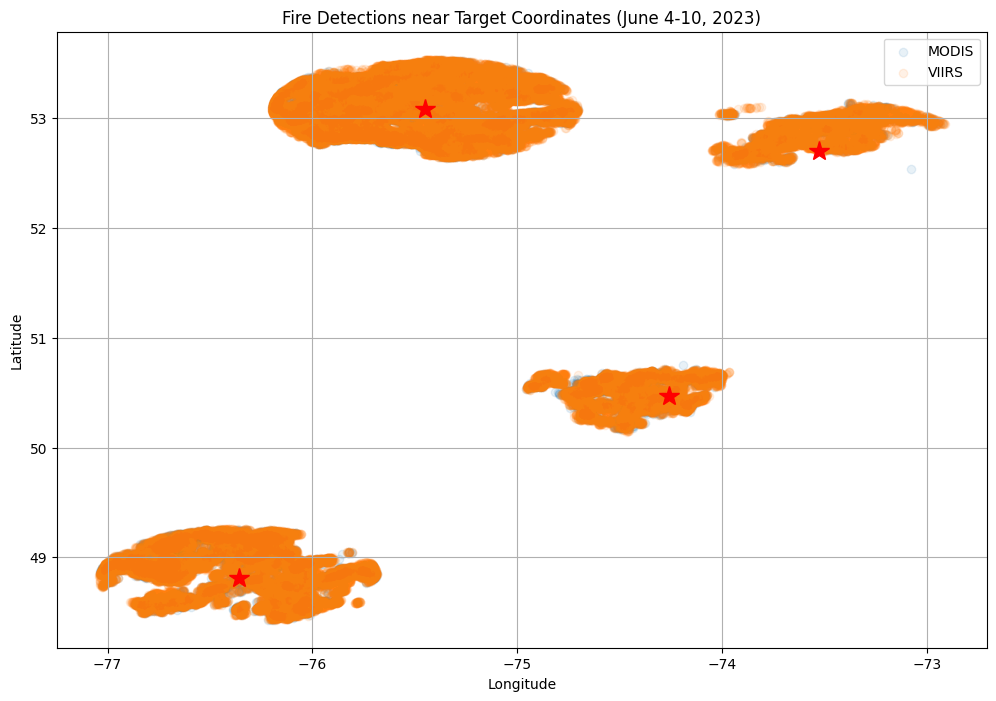

Number of MODIS detections: 11927
Number of VIIRS detections: 74578


In [12]:
# Scatter plot of fire locations
plt.figure(figsize=(12, 8))
plt.scatter(modis_combined['longitude'], modis_combined['latitude'], alpha=0.1, label='MODIS')
plt.scatter(viirs_combined['longitude'], viirs_combined['latitude'], alpha=0.1, label='VIIRS')

for coord in target_coords:
    plt.plot(coord[1], coord[0], 'r*', markersize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Detections near Target Coordinates (June 4-10, 2023)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of MODIS detections: {len(modis_combined)}")
print(f"Number of VIIRS detections: {len(viirs_combined)}")

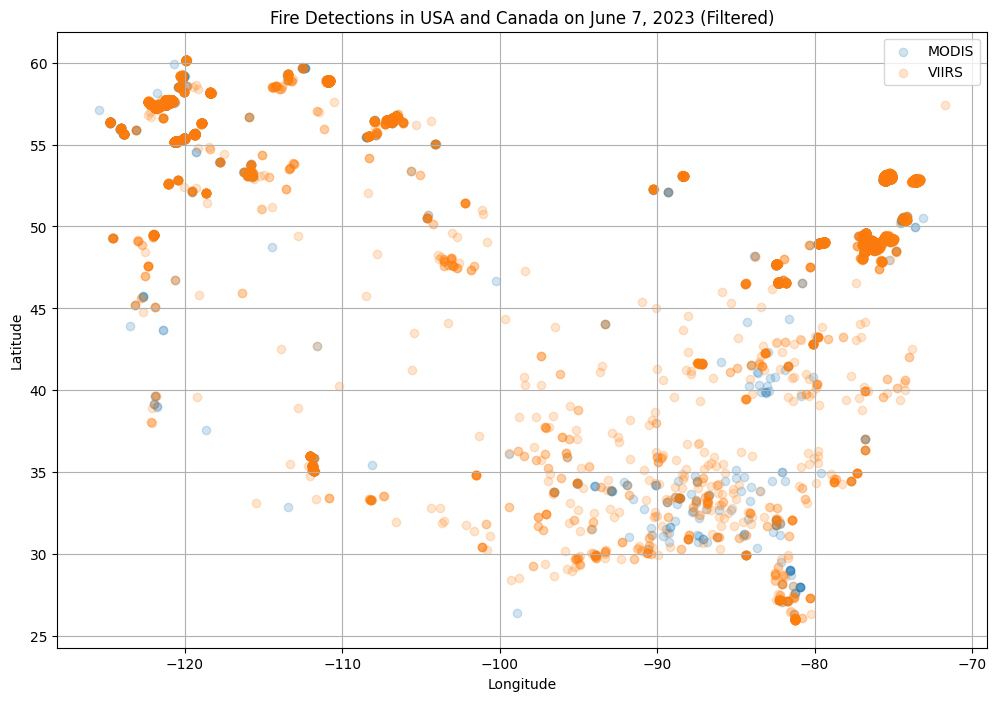

Number of MODIS detections on June 7, 2023 after filtering: 1748
Number of VIIRS detections on June 7, 2023 after filtering: 9419


In [29]:
# Define boundaries to filter out outliers
min_latitude = 25    # Minimum latitude to keep
min_longitude = -140 # Minimum longitude to keep

# Filter data for June 7th, 2023
modis_all_june7 = pd.concat([modis_data_us, modis_data_ca])
modis_all_june7 = modis_all_june7[modis_all_june7['acq_date'] == '2023-06-07']

viirs_all_june7 = pd.concat([viirs_data_us, viirs_data_ca])
viirs_all_june7 = viirs_all_june7[viirs_all_june7['acq_date'] == '2023-06-07']

# Filter data for June 7th, 2023, without outliers
modis_filtered = modis_all_june7[(modis_all_june7['latitude'] >= min_latitude) & (modis_all_june7['longitude'] >= min_longitude)]
viirs_filtered = viirs_all_june7[(viirs_all_june7['latitude'] >= min_latitude) & (viirs_all_june7['longitude'] >= min_longitude)]

# Plot filtered data without outliers
plt.figure(figsize=(12, 8))

plt.scatter(modis_filtered['longitude'], modis_filtered['latitude'], alpha=0.2, label='MODIS')
plt.scatter(viirs_filtered['longitude'], viirs_filtered['latitude'], alpha=0.2, label='VIIRS')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Detections in USA and Canada on June 7, 2023 (Filtered)')
plt.legend()
plt.grid(True)
plt.show()

# Print the number of detections for each sensor after filtering
print(f"Number of MODIS detections on June 7, 2023 after filtering: {len(modis_filtered)}")
print(f"Number of VIIRS detections on June 7, 2023 after filtering: {len(viirs_filtered)}")


In [33]:
# Nice outline of th United states and parts of Canada